In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
theta1 = np.deg2rad(45.) 
theta2 = np.deg2rad(5.) #Degrees
theta3 = np.deg2rad(45.) #Degrees
Ue1 = np.cos(theta2)*np.cos(theta3)
Ue2 = np.sin(theta3)*np.cos(theta2)
Ue3 = np.sin(theta2)
Umu1=-np.sin(theta3)*np.cos(theta1)-np.sin(theta1)*np.sin(theta2)*np.cos(theta3)
Umu2=np.cos(theta1)*np.cos(theta3)-np.sin(theta1)*np.sin(theta2)*np.sin(theta3)
Umu3=np.sin(theta1)*np.cos(theta2)
Ut1=np.sin(theta1)*np.sin(theta3)-np.sin(theta2)*np.cos(theta1)*np.cos(theta3)
Ut2=-np.sin(theta1)*np.cos(theta3)-np.sin(theta2)*np.sin(theta3)*np.cos(theta1)
Ut3=np.cos(theta1)*np.cos(theta2)


In [6]:

numCKM=np.matrix([[Ue1, Ue2, Ue3], [Umu1, Umu2, Umu3], [Ut1, Ut2, Ut3]])
invCKM=np.linalg.inv(numCKM)
print numCKM
print numCKM.dot(numCKM.transpose())

[[ 0.70441603  0.70441603  0.08715574]
 [-0.54357787  0.45642213  0.70441603]
 [ 0.45642213 -0.54357787  0.70441603]]
[[  1.00000000e+00   6.16150314e-17  -1.19754642e-17]
 [  6.16150314e-17   1.00000000e+00  -8.57413779e-17]
 [ -1.19754642e-17  -8.57413779e-17   1.00000000e+00]]


In [8]:
def lon_conversion(lon_km):
    return lon_km*1e3/(1.972e-7)

In [9]:
dM32 = 3.2e-3#eV^2
dm21 = 0.#eV^2


def calculateOperator(neutrinoEnergy, A, L):
    global dM32, dm21
    E32= dM32/(2.*neutrinoEnergy)
    E21= dm21/(2.*neutrinoEnergy)
    E12=-E21
    E23=-E32
    E31=-E12-E23
    E13=-E31
    T_11=A*Ue1*Ue1-(1./3)*A+(1./3)*(E12+E13)
    T_12=A*Ue1*Ue2
    T_13=A*Ue1*Ue3
    T_21=T_12
    T_22=A*Ue2*Ue2-(1./3)*A+(1./3)*(E21+E23)
    T_23=A*Ue2*Ue3
    T_31=T_13
    T_32=T_23
    T_33=A*Ue3*Ue3-(1./3)*A+(1./3)*(E31+E32)
    T_mass_mat=np.matrix([[T_11, T_12, T_13], \
             [T_21, T_22, T_23],\
            [T_31, T_32, T_33]])
    T_sq_mass_mat=T_mass_mat**2
    c1=T_11*T_22-T_12*T_21+T_11*T_33-T_13*T_31+T_22*T_33-T_23*T_32
    c0=-(T_11*T_22*T_33-T_11*T_23*T_32-T_12*T_21*T_33+T_12*T_31*T_23+T_13*T_21*T_32-T_13*T_31*T_22)
    eigVal,_ =np.linalg.eig(T_mass_mat)
    lam3, lam2, lam1 = eigVal[:]
    
    T_flav_mat=numCKM.dot(T_mass_mat).dot(numCKM.transpose())
    T_sq_flav_mat=numCKM.dot(T_sq_mass_mat).dot(numCKM.transpose())
    trace_hamiltonian=0.5*E21+E32+3*neutrinoEnergy+A
    phi_phase=np.exp(-1j*L*trace_hamiltonian/3)
   
    evol_operator=np.matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
    for lam in eigVal:
        I_term= np.identity(3)*(lam**2+c1)
        T_term=lam*T_flav_mat
        evol_operator=evol_operator+phi_phase*np.exp(-1j*L*lam)*(I_term+T_term+T_sq_flav_mat)*1./(3*lam**2+c1)
    return evol_operator
calculateOperator(1e9, 1e-14, lon_conversion(1.))

matrix([[ 0.33953037 -9.40594828e-01j, -0.00046920 -1.67266825e-04j,
         -0.00046920 -1.67266825e-04j],
        [-0.00046920 -1.67266825e-04j,  0.33584395 -9.41908904e-01j,
         -0.00379217 -1.35199133e-03j],
        [-0.00046920 -1.67266825e-04j, -0.00379217 -1.35199133e-03j,
          0.33584395 -9.41908904e-01j]])

In [10]:
EnergyLinsp=np.linspace(1e9, 1e10, 100)
SpaceArr=np.linspace(0, (2885.+6972.), 10000)
densityStep=np.zeros(10000)
densityStep[SpaceArr<=2885.]=1.7e-13
densityStep[SpaceArr>2885.]=4.4e-13

In [11]:
Probs=np.zeros(100)
for i in range(len(EnergyLinsp)):
    E=EnergyLinsp[i]
    
    accOper=np.identity(3)
    for k in range(10000):
        L=SpaceArr[k]
        A=densityStep[k]
        acc=np.copy(accOper)
        thisLOperator=calculateOperator(E,A,lon_conversion(L))
        accOper=thisLOperator.dot(acc)
    #herm=accOper.getH()
    #ProbMat=accOper.dot(herm)
    #ProbMat=abs(accOper)**2
    #print accOper[1,1], type(accOper[0,1]), herm[1,1], ProbMat[0,0]
    Probs[i]=np.absolute(accOper[1,0])**2

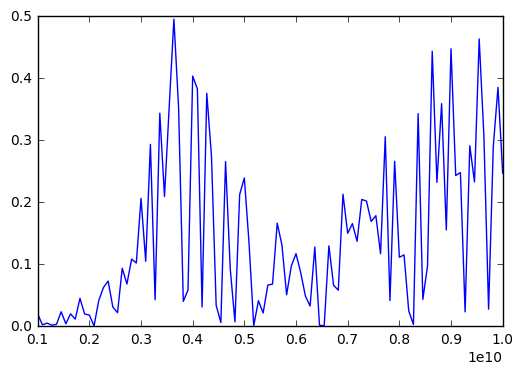

In [12]:

plt.plot(EnergyLinsp,Probs)
plt.show()

In [17]:
lista=[]
for i in range(1, 5):
    element=i+(i-1)*1j
    lista.append(np.matrix([[element, element, element], [element, element, element], [element, element, element]]))
print lista[3].dot(lista[2]).dot(lista[1]).dot(lista[0])    

[[-135.+1080.j -135.+1080.j -135.+1080.j]
 [-135.+1080.j -135.+1080.j -135.+1080.j]
 [-135.+1080.j -135.+1080.j -135.+1080.j]]


In [18]:
operator_product=np.identity(3)
for i in range(1, 5):
    element=i+(i-1)*1j
    iter_operator=np.matrix([[element, element, element], [element, element, element], [element, element, element]])
    operator_product_copy=np.copy(operator_product)
    operator_product=iter_operator.dot(operator_product_copy)
    
print operator_product
    

[[-135.+1080.j -135.+1080.j -135.+1080.j]
 [-135.+1080.j -135.+1080.j -135.+1080.j]
 [-135.+1080.j -135.+1080.j -135.+1080.j]]
